In [30]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import linalg as lg 


In [31]:
def import_data():
    df = pd.read_csv('SCLC.csv',header=None)
    df1 = df.drop(df.index[0])
    df2 = df1.drop(df.columns[0], axis=1)
    return df2

In [38]:
df2 = import_data()
df3 = df2

df3_1 = df2.values[0:20,:]
df3_2 = df2.values[20:, : ]

print(df3_1.shape)

(20, 19)


In [68]:
m_1 = df3_1.mean(axis = 0)
m_2 = df3_2.mean(axis = 0)
mean_all = df2.mean(axis = 0)
print(m_1.shape)
print(m_1)

(19,)
[1133127.114115    82384.880499   197749.555629   128947.2986565
 1402521.28558    836545.931695  1613716.532435   630757.255035
  298639.72865   1148116.663105   406195.37644   1714915.9352
  618864.561485    86910.615099   526820.906125  1607163.90325
  600946.756865   597854.02698    499961.789415 ]


In [47]:
mean_1 = m_1.reshape(1,19)
print(mean_1)
mean_1 = np.repeat(mean_1,20,axis = 0)
print(mean_1.shape)

mean_2 = m_2.reshape(1,19)
mean_2 = np.repeat(mean_2,20,axis = 0)


[[1133127.114115    82384.880499   197749.555629   128947.2986565
  1402521.28558    836545.931695  1613716.532435   630757.255035
   298639.72865   1148116.663105   406195.37644   1714915.9352
   618864.561485    86910.615099   526820.906125  1607163.90325
   600946.756865   597854.02698    499961.789415 ]]
(20, 19)


In [63]:
within_class_scatter = np.zeros((19,19))
wcs_1 = np.zeros((19,19))

df3_1_centered = df3_1 - mean_1
wcs_1 = df3_1_centered.T @ df3_1_centered
# print(wcs_1)
wcs_2 = np.zeros((19,19))
df3_2_centered = df3_2 - mean_2
wcs_2 = df3_2_centered.T @ df3_2_centered

within_class_scatter = wcs_1 + wcs_2
print(within_class_scatter.shape)

(19, 19)


In [106]:
bcs_1 = np.multiply(len(df3_1),np.outer((m_1 - mean_all),(m_1 - mean_all)))
bcs_2 = np.multiply(len(df3_2),np.outer((m_2 - mean_all),(m_2 - mean_all)))
print(bcs_1.shape)

between_class_scatter = bcs_1 + bcs_2

e_val, e_vector = np.linalg.eig(lg.inv(within_class_scatter) @ between_class_scatter)
for e, _ in enumerate(e_val):
    e_scatter = e_vector[:,e].reshape(19,1)
    # print(e_val[e].real)

print(between_class_scatter)

(19, 19)
[[ 1.86606693e+10  3.86312688e+09  2.47742565e+10  8.11472160e+09
  -3.30659434e+11 -9.95343428e+10  1.23238101e+10 -3.72997897e+10
   5.68470841e+10 -2.28685455e+11 -8.44098753e+10  1.58444114e+11
   5.88521149e+10  5.04958075e+09 -5.28222765e+10 -2.54983839e+11
  -1.00120925e+11  1.16851350e+11 -1.08381673e+11]
 [ 3.86312688e+09  7.99743519e+08  5.12876012e+09  1.67990755e+09
  -6.84530298e+10 -2.06055737e+10  2.55127194e+09 -7.72179272e+09
   1.17684685e+10 -4.73424032e+10 -1.74745104e+10  3.28010592e+10
   1.21835495e+10  1.04536289e+09 -1.09352539e+10 -5.27866878e+10
  -2.07270078e+10  2.41905359e+10 -2.24371457e+10]
 [ 2.47742565e+10  5.12876012e+09  3.28907703e+10  1.07732575e+10
  -4.38989702e+11 -1.32143671e+11  1.63613227e+10 -4.95199044e+10
   7.54712612e+10 -3.03607124e+11 -1.12064143e+11  2.10353395e+11
   7.81331779e+10  6.70391866e+09 -7.01278507e+10 -3.38521354e+11
  -1.32922429e+11  1.55134056e+11 -1.43889554e+11]
 [ 8.11472160e+09  1.67990755e+09  1.07732575e

In [104]:
eig_pairs = [(np.abs(e_val[i]).real, e_vector[:,i].real) for i in range(len(e_val))]

eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

In [98]:
print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    # print(i[0])
    i

Eigenvalues in decreasing order:



In [96]:
first_eigenvalue = eig_pairs[0][1].reshape(19,1)
W = first_eigenvalue

# W

In [107]:
# 40*19x19*1
lda_project = df2 @ W

# lda_project

/tmp/ipykernel_2399083/3587563490.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


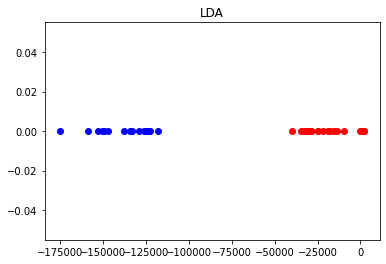

In [108]:
#plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('LDA')
ax.plot(lda_project[0:20], np.zeros(20), linestyle='None', marker='o', color='blue', label='NSCLC')
ax.plot(lda_project[20:40], np.zeros(20), linestyle='None', marker='o', color='red', label='SCLC')
fig.show()

[[ 3.25296264]
 [ 6.87395904]
 [ 4.22018965]
 [ 5.07509696]
 [ 3.93463394]
 [ 5.72516785]
 [ 3.8613171 ]
 [ 3.95272386]
 [ 5.28479124]
 [ 3.26522652]
 [ 5.08498545]
 [ 3.57189064]
 [ 5.05511495]
 [ 3.15378176]
 [ 4.86686796]
 [ 2.81120157]
 [ 3.93543558]
 [ 3.39771836]
 [ 3.25628819]
 [ 3.21596383]
 [-4.49065733]
 [-4.6115194 ]
 [-3.45215203]
 [-2.75643608]
 [-3.83408221]
 [-3.54607243]
 [-3.25235288]
 [-3.40306303]
 [-4.04197759]
 [-4.35872643]
 [-5.76347876]
 [-5.589837  ]
 [-5.74304609]
 [-3.85936631]
 [-3.13967526]
 [-3.56371641]
 [-5.68605839]
 [-4.9237813 ]
 [-3.53641015]
 [-4.242908  ]]


/tmp/ipykernel_2399083/2883398154.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


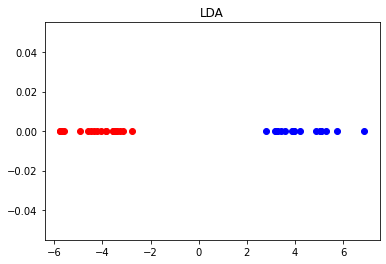

In [3]:

y1_ = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] 

# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
sklearn_lda = LDA(n_components=1)
X_lda_sklearn = sklearn_lda.fit_transform(df2, y1_)

X_lda_sklearn= -X_lda_sklearn

print(X_lda_sklearn)

#plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('LDA')
ax.plot(X_lda_sklearn[0:20], np.zeros(20), linestyle='None', marker='o', color='blue', label='NSCLC')
ax.plot(X_lda_sklearn[20:40], np.zeros(20), linestyle='None', marker='o', color='red', label='SCLC')
fig.show()